# Chapter 09 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Example: Blood Loss in Pigs

 Create the dataset

In [3]:
data = pd.DataFrame({
    "control": [786, 375, 4446, 2886, 478, 587, 434, 4764, 3281, 3837],
    "Treatment": [543, 666, 455, 823, 1716, 797, 2828, 1251, 702, 1078],
})
data.mean(axis=0)

control      2187.4
Treatment    1085.9
dtype: float64

## Resampling procedure

In [4]:
random.seed(1234)
box = [*data["control"], *data["Treatment"]]
differences = []
for _ in range(1000):
    # create resamples without replacement (permutation test)
    random.shuffle(box)
    resample_c = box[:10]
    resample_t = box[10:]
    differences.append(np.mean(resample_t) - np.mean(resample_c))
differences = np.array(differences)
count_below = sum(differences <= -1101)
p_value = count_below / len(differences)
print(f"Number of differences <= -1101: {count_below}")
print(f"p-value: {p_value}")

Number of differences <= -1101: 41
p-value: 0.041


 Visualize the resampled differences

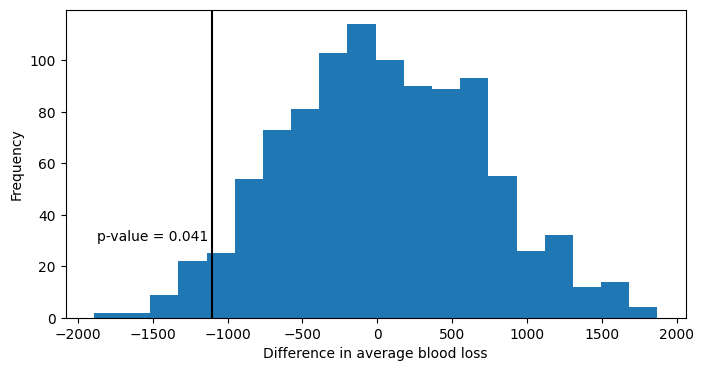

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(differences).plot.hist(ax=ax, bins=20)
ax.axvline(-1101, color="black")
ax.text(-1500, 30, f"p-value = {p_value:.3f}", ha="center")
ax.set_xlabel("Difference in average blood loss")
ax.set_ylabel("Frequency")
plt.show()

# Example: Cholesterol and myocardial infarctions (MI)

## Resampling procedure (difference in proportions)

In [6]:
random.seed(123)
box = [1] * 31 + [0] * (605 - 31)
differences = []
for _ in range(1000):
    # create resamples without replacement (permutation test)
    random.shuffle(box)
    resample_c = box[:135]
    resample_t = box[135:]
    prop_c = sum(resample_c) / len(resample_c)
    prop_t = sum(resample_t) / len(resample_t)
    differences.append(prop_t - prop_c)
differences = np.array(differences)
count_above = sum(differences >= 0.0294)
p_value = count_above / len(differences)
print(f"Number of differences >= 0.0294: {count_above}")
print(f"p-value: {p_value}")

Number of differences >= 0.0294: 66
p-value: 0.066


 Visualize the resampled differences

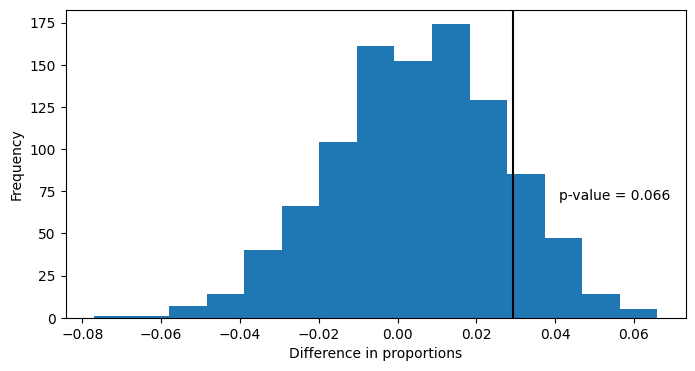

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(differences).plot.hist(ax=ax, bins=15)
ax.axvline(0.0294, color="black")
ax.text(0.055, 70, f"p-value = {p_value:.3f}", ha="center")
ax.set_xlabel("Difference in proportions")
ax.set_ylabel("Frequency")
plt.show()

# Example: hospital error reduction

 Implement the resampling procedure

In [8]:
random.seed(123)
data = pd.read_csv("hospitalerrors_2.csv")
all_reductions = list(data["Reduction"])
n_treatment = sum(data["Treatment"] == 1)
error_reduction = []
for _ in range(1000):
    random.shuffle(all_reductions)
    resample_t = all_reductions[:n_treatment]
    resample_c = all_reductions[n_treatment:]
    error_reduction.append(np.mean(resample_t) - np.mean(resample_c))
observed = (np.mean(data[data["Treatment"] == 1]["Reduction"]) -
            np.mean(data[data["Treatment"] == 0]["Reduction"]))
counts_above = sum(error_reduction >= observed)
p_value = counts_above / len(error_reduction)
print(f"observed error reduction: {observed:.2f}")
print(f"counts above: {counts_above}")
print(f"p-value: {p_value:.3f}")

observed error reduction: 0.92
counts above: 16
p-value: 0.016


 Visualize the error rate deduction distribution

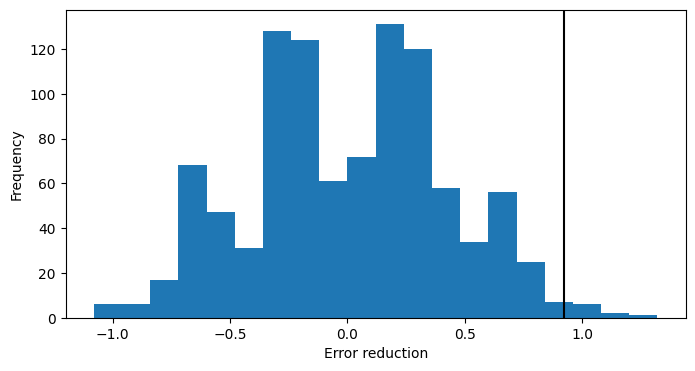

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(error_reduction).plot.hist(ax=ax, bins=20)
ax.axvline(observed, color="black")
ax.set_xlabel("Error reduction")
ax.set_ylabel("Frequency")
plt.show()

# One-tailed and two-tailed test

 One-tailed test 

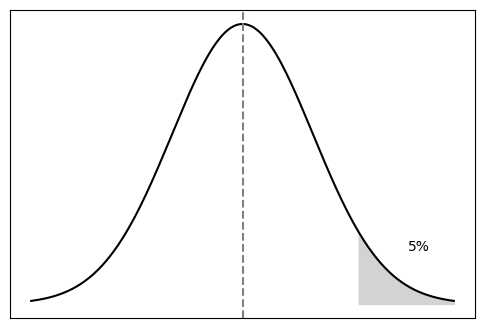

In [10]:
x = np.linspace(-3, 3, 401)
y = stats.norm.pdf(x)
p_95 = stats.norm.ppf(0.95)
p_025 = stats.norm.ppf(0.025)
p_975 = stats.norm.ppf(0.975)

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")
ax.axvline(0, c="grey", linestyle="--")

ax.fill_between(x[x>p_95], y[x>p_95], color="lightgrey")
ax.text(2.5, 0.075, "5%", horizontalalignment="center")

ax.set_xlabel("")
ax.set_ylabel("")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()

 Two-tailed test 

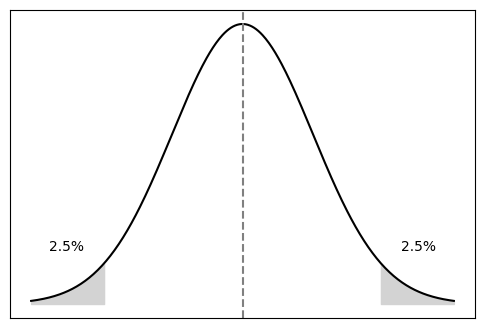

In [11]:
fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")
ax.axvline(0, c="grey", linestyle="--")

ax.fill_between(x[x>p_975], y[x>p_975], color="lightgrey")
ax.fill_between(x[x<p_025], y[x<p_025], color="lightgrey")
ax.text(2.5, 0.075, "2.5%", horizontalalignment="center")
ax.text(-2.5, 0.075, "2.5%", horizontalalignment="center")

ax.set_xlabel("")
ax.set_ylabel("")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()

# Paired Comparisons

 Load reading scores dataset

In [12]:
scores = pd.DataFrame({
    "without music": [24, 79, 17, 50, 98, 45, 97, 67, 78, 85, 76],
    "with music": [27, 80, 18, 50, 99, 47, 97, 70, 79, 87, 78],
})
means = scores.mean(axis=0)
means["difference"] = means["with music"] - means["without music"]
print(means)

without music    65.090909
with music       66.545455
difference        1.454545
dtype: float64


 Implement standard two-sample testing procedure and create histogram

In [13]:
box = [*scores["without music"], *scores["with music"]]
differences = []
for _ in range(1000):
    random.shuffle(box)
    resample_without = box[:11]
    resample_with = box[11:]
    differences.append(np.mean(resample_with) - np.mean(resample_without))
differences = np.array(differences)

 Plot histogram

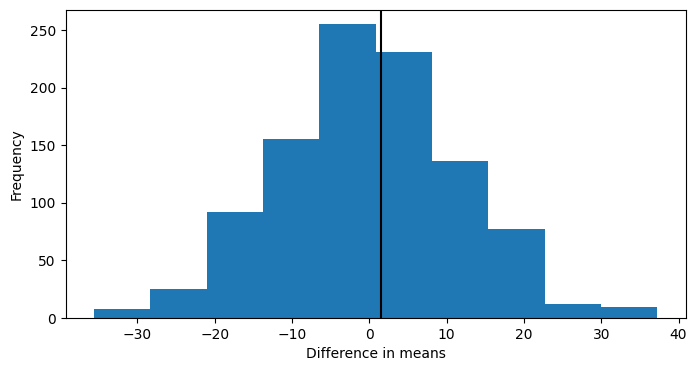

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(differences, bins=10)
ax.axvline(1.45, color="black")
ax.set_xlabel("Difference in means")
ax.set_ylabel("Frequency")
plt.show()

 Implement paired resampling test

In [15]:
pairs = [[row["without music"], row["with music"]] for _, row in scores.iterrows()]
differences = []
for _ in range(1000):
    # Shuffle the pairs
    shuffled_pairs = [random.sample(pair, 2) for pair in pairs]
    resample_without = [pair[0] for pair in shuffled_pairs]
    resample_with = [pair[1] for pair in shuffled_pairs]
    differences.append(np.mean(resample_with) - np.mean(resample_without))
differences = np.array(differences)

 Plot histogram

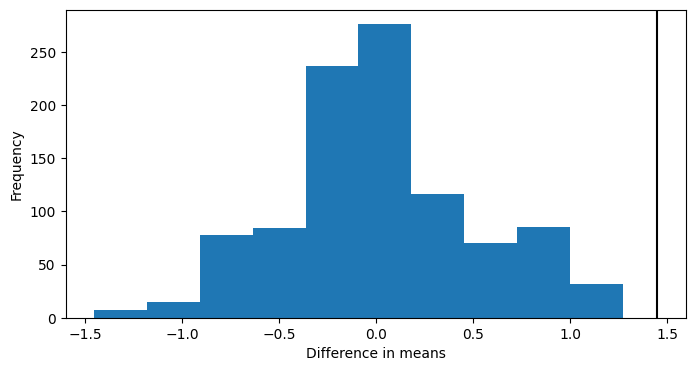

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(differences, bins=10)
ax.axvline(1.45, color="black")
ax.set_xlabel("Difference in means")
ax.set_ylabel("Frequency")
plt.show()

 Paired t-test for reading results

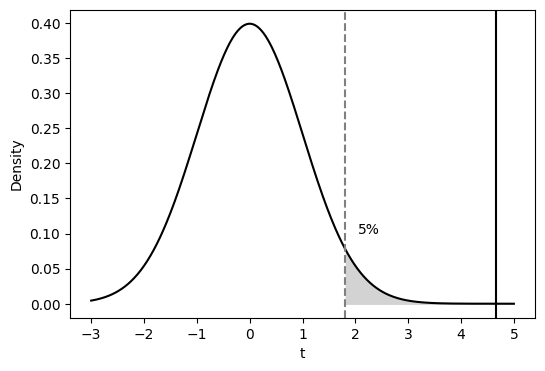

In [17]:
scores["difference"] = scores["with music"] - scores["without music"]
observed = (np.mean(scores["difference"]) /
            (np.std(scores["difference"]) / np.sqrt(10)))

x = np.linspace(-3, 5, 401)
y = stats.norm.pdf(x)
p_95 = stats.t.ppf(0.95, 10)

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")
ax.axvline(p_95, c="grey", linestyle="--")
ax.axvline(observed, c="black")

ax.fill_between(x[x>p_95], y[x>p_95], color="lightgrey")
ax.text(2.25, 0.1, "5%", horizontalalignment="center")

ax.set_xlabel("t")
ax.set_ylabel("Density")
plt.show()

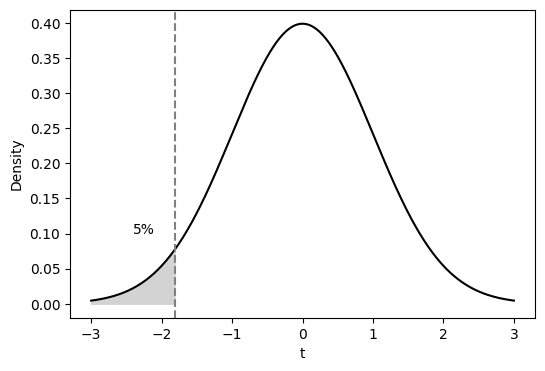

In [18]:
x = np.linspace(-3, 3, 401)
y = stats.norm.pdf(x)
p_05 = stats.t.ppf(0.05, 10)

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")
ax.axvline(p_05, c="grey", linestyle="--")

ax.fill_between(x[x<p_05], y[x<p_05], color="lightgrey")
ax.text(-2.25, 0.1, "5%", horizontalalignment="center")

ax.set_xlabel("t")
ax.set_ylabel("Density")
plt.show()